# IMPORTING LIBRARIES

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [70]:
df = pd.read_csv("Datasets/customer_churn.csv",
                 usecols=['SeniorCitizen','Partner','Dependents','tenure',
                          'PaperlessBilling','MonthlyCharges','TotalCharges','Churn'])

In [71]:
df.dropna()

,SeniorCitizen,Partner,Dependents,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,1,29.85,29.85,0
1,0,0,0,34,0,56.95,1889.50,0
2,0,0,0,2,1,53.85,108.15,1
3,0,0,0,45,0,42.30,1840.75,0
4,0,0,0,2,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,84.80,1990.50,0
7039,0,1,1,72,1,103.20,7362.90,0
7040,0,1,1,11,1,29.60,346.45,0
7041,1,1,0,4,1,74.40,306.60,1


In [72]:
X = df.drop(columns=['Churn'], axis=1)
y = df['Churn']

# SPLITING THE DATA

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# FEATURE SCALING

In [89]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LOGISTIC REGRESSION

In [90]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

# GRADIENT BOOSTING

In [91]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

In [92]:
# Model evaluation
models = [('Logistic Regression', lr_predictions),
          ('Gradient Boosting', gb_predictions)]

In [93]:
for model_name, predictions in models:
    accuracy = accuracy_score(y_test, predictions)
    confusion_mat = confusion_matrix(y_test, predictions)
    classification_rep = classification_report(y_test, predictions)

    print(f'\n{model_name} Model:')
    print(f'Accuracy: {accuracy}')
    print(f'Confusion Matrix:\n{confusion_mat}')
    print(f'Classification Report:\n{classification_rep}')



Logistic Regression Model:
Accuracy: 0.7998580553584103
Confusion Matrix:
[[947  89]
 [193 180]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409


Gradient Boosting Model:
Accuracy: 0.801277501774308
Confusion Matrix:
[[942  94]
 [186 187]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



# ACCURACY

In [102]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Example using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Other metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7998580553584103
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.67      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
[[947  89]
 [193 180]]


In [94]:
y_pred = lr_model.predict(X_test)

# CONFUSION MATRIX

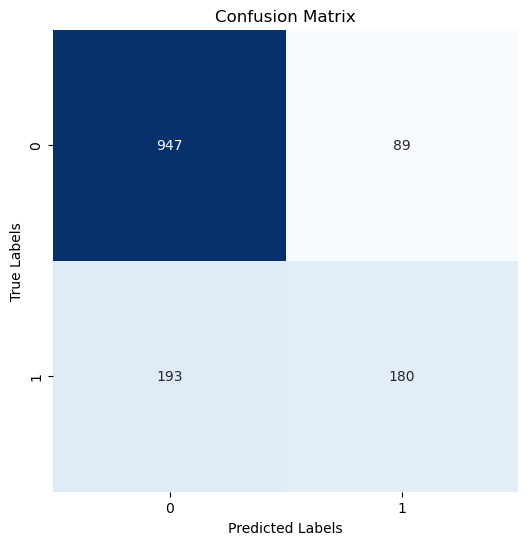

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# PRECISION CURVE

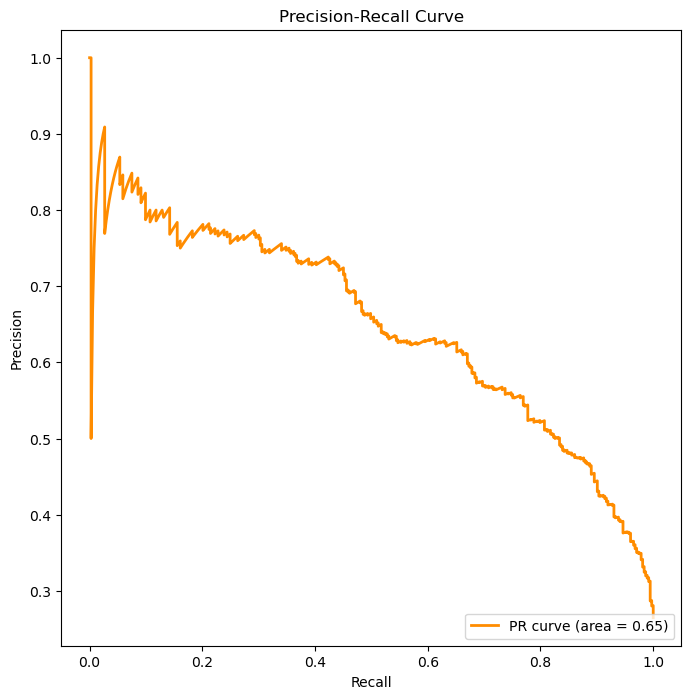

In [96]:
from sklearn.metrics import precision_recall_curve, auc

precision, recall, _ = precision_recall_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (area = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


# ROC CURVE

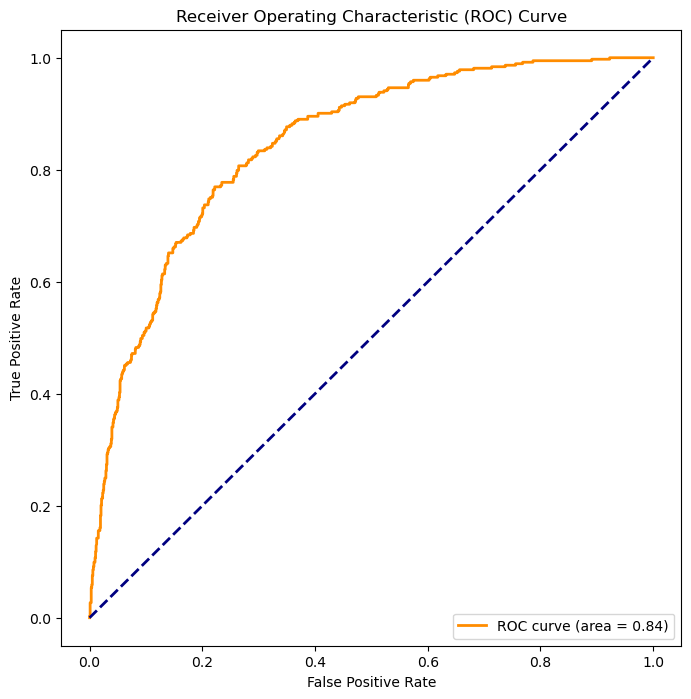

In [97]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


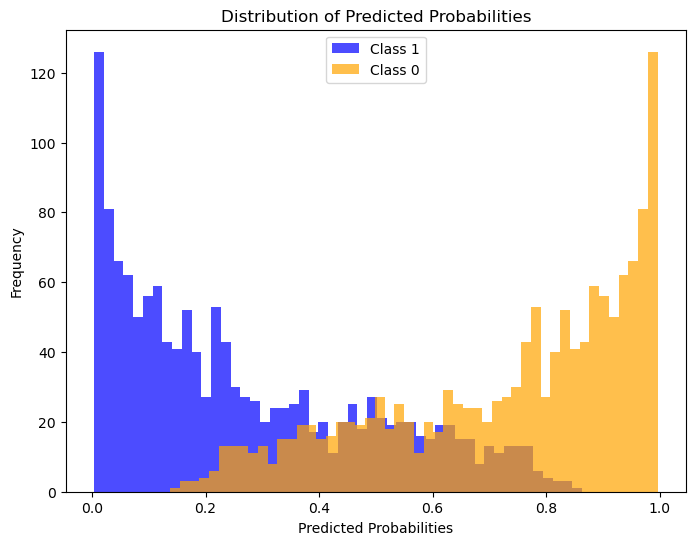

In [98]:
plt.figure(figsize=(8, 6))
plt.hist(lr_model.predict_proba(X_test)[:, 1], bins=50, alpha=0.7, color='blue', label='Class 1')
plt.hist(lr_model.predict_proba(X_test)[:, 0], bins=50, alpha=0.7, color='orange', label='Class 0')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()


# LOGISTIC REGRESSION - FEATURE IMPORTANCE

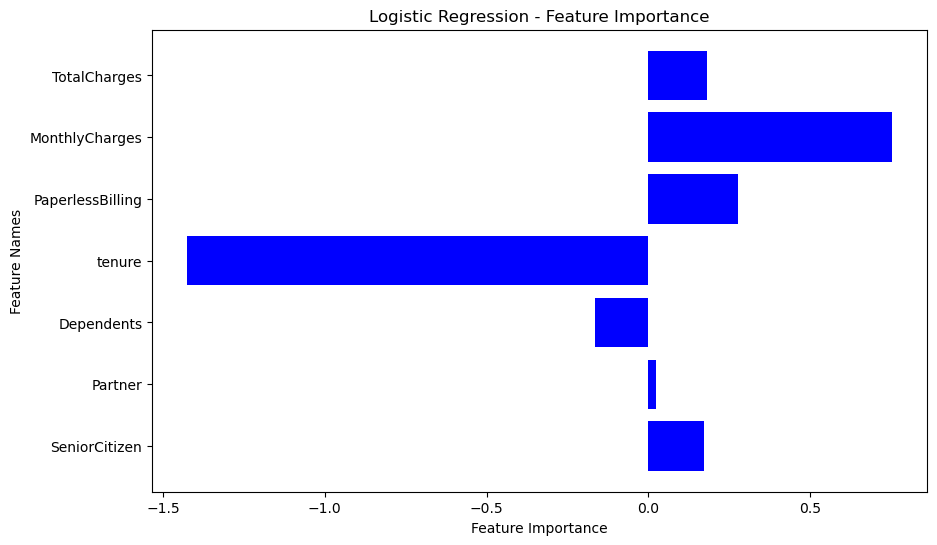

In [99]:
if hasattr(lr_model, 'coef_'):
    feature_importance = lr_model.coef_[0]
    feature_names = X.columns

    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, feature_importance, color='blue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')
    plt.title('Logistic Regression - Feature Importance')
    plt.show()
